In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import spearmanr, pearsonr
pd.set_option('display.width', 2000)

In [8]:
nucleus_df = pd.read_csv('csv/nuclei_liv_2.csv')
print(nucleus_df)

#nucleus_df = nucleus_df[nucleus_df['Location'] == 'DG']

# for name in (nucleus_df['ImageName']).unique():
#     df = nucleus_df[nucleus_df['ImageName'] == name]
#     sns.violinplot(data=df, x='ImageName',y='Ch3Intensity')
#     plt.show()
result = nucleus_df.groupby('ImageName').agg(
    Condition=('Condition', 'first'),
    TotalNuclei=('Label', 'count'),
    NeuronNuclei=('CellType', lambda x: (x == 'Neuron').sum()),
     GFPPositiveNuclei=('gfpPositive', lambda x: x.sum()),
     NeuronAndGFPPositive=('gfpPositive', lambda x: ((x == True) & (nucleus_df['CellType'] == 'Neuron')).sum())
)
result['ProportionNeuronAndGFP'] = result['NeuronAndGFPPositive'] / result['NeuronNuclei']
print(result)


       Condition                          ImageName  Label    Area                                           Centroid   CellType  Location  Ch1Intensity  Ch2Intensity  Ch3Intensity  Ch4Intensity gfpPositive
0             DG   170123_A1_363_NeuN-GFP_S2_DG.czi      1  2090.0  (20.383732057416267, 556.8325358851674, 1692.4...  Undefined       NaN     28.441627    197.297129     18.239713           NaN         NaN
1             DG   170123_A1_363_NeuN-GFP_S2_DG.czi      2  3358.0  (20.22900536033353, 316.22453841572366, 548.24...  Undefined       NaN     27.680465     66.195057     34.830554           NaN        True
2             DG   170123_A1_363_NeuN-GFP_S2_DG.czi      3  2013.0  (16.98708395429707, 1252.2762046696473, 588.39...  Undefined       NaN     28.562842    226.718828     16.508197           NaN         NaN
3             DG   170123_A1_363_NeuN-GFP_S2_DG.czi      4  2474.0  (15.221099434114794, 2457.227162489895, 407.10...  Undefined       NaN     30.666128    228.996766      

c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


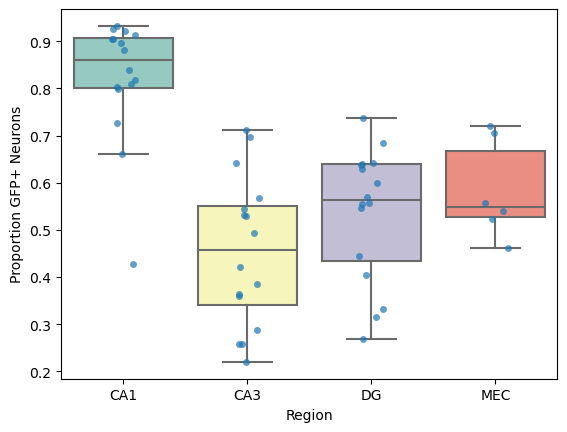

In [11]:
sns.boxplot(data=result, x='Condition', y='ProportionNeuronAndGFP', showfliers=False,order=['CA1','CA3','DG', 'MEC'], palette="Set3")
sns.stripplot(data=result, x='Condition', y='ProportionNeuronAndGFP', order=['CA1','CA3','DG', 'MEC'], alpha=0.7)
plt.xlabel("Region")
plt.ylabel("Proportion GFP+ Neurons")
plt.savefig('gfpNeurons.pdf')
plt.show()